<a href="https://colab.research.google.com/github/aida-suryadi/CNN_DL---Image-Classification-/blob/main/Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Description : This program classified images

In [ ]:
#import lib needed
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
#load Data
from keras.datasets import cifar10
(x_train, y_train), (x_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
# Look at the data type
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Shape Arrays 
print('x_train shape: ', x_train.shape) #4D
print('x_train shape: ', y_train.shape) #2D
print('x_train shape: ', x_test.shape)
print('x_train shape: ', y_test.shape)

x_train shape:  (50000, 32, 32, 3)
x_train shape:  (50000, 1)
x_train shape:  (10000, 32, 32, 3)
x_train shape:  (10000, 1)


In [ ]:
# look at first image as an array
index = 10 #change here to see image
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

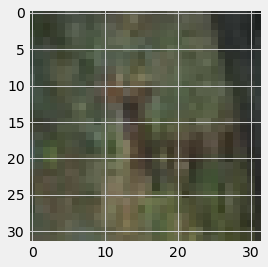

In [ ]:
# look image as pic
img = plt.imshow(x_train[index]) #frog? 

In [ ]:
#Get the image label
print( 'The image label is: ', y_train[index]) # 6 classified frog

The image label is:  [4]


In [ ]:
#Get the image classification
classification = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#print the image class
print('The image class is:', classification[y_train[index][0]])

The image class is: deer


In [ ]:
#convert the labels into set of 10 numb. to input into neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#print new labels
print(y_train_one_hot) 

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new labels of the image/picture above
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
#Normalise the pixels to be values between 0 and 1
x_train= x_train /255
x_test = x_test /255

In [ ]:
x_train[index]

array([[[3.19635736e-06, 3.92006091e-06, 3.19635736e-06],
        [3.25666599e-06, 3.79944365e-06, 3.13604873e-06],
        [3.37728325e-06, 3.61851776e-06, 3.01543147e-06],
        ...,
        [2.83450558e-06, 3.07574010e-06, 3.01543147e-06],
        [2.47265381e-06, 2.71388832e-06, 2.65357969e-06],
        [1.44740711e-06, 1.68864162e-06, 1.62833299e-06]],

       [[2.77419695e-06, 3.55820914e-06, 2.47265381e-06],
        [3.19635736e-06, 3.73913502e-06, 2.71388832e-06],
        [3.25666599e-06, 3.55820914e-06, 2.65357969e-06],
        ...,
        [2.53296244e-06, 2.77419695e-06, 2.71388832e-06],
        [2.35203655e-06, 2.59327106e-06, 2.53296244e-06],
        [1.68864162e-06, 1.92987614e-06, 1.86956751e-06]],

       [[2.71388832e-06, 3.55820914e-06, 2.29172792e-06],
        [3.01543147e-06, 3.61851776e-06, 2.47265381e-06],
        [2.77419695e-06, 3.13604873e-06, 2.05049340e-06],
        ...,
        [2.29172792e-06, 2.53296244e-06, 2.47265381e-06],
        [2.17111066e-06, 2.41

In [ ]:
#create models architecture
model= Sequential()

#add the first layer
#model.add(Conv2D,(32,(5,5), activation="relu", input_shape=(32,32,3)))
model.add(Conv2D(32, (5, 5), activation='relu', input_shape = (32, 32, 3)))
#add pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))
#add another convolution layer
model.add(Conv2D(32, (5, 5), activation='relu'))
#model.add(Activation("relu"))
#add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add a flattening error
model.add(Flatten())

#add a layer with 1000 neurons
model.add(Dense(1000, activation='relu'))
#model.add(activation("relu"))
#add a drop out layer
model.add(Dropout(0.5))
#model.add(activation("relu"))
#add a layer with 500 neurons
model.add(Dense(500, activation='relu'))
#model.add(Activation("relu"))
#add a drop out layer
model.add(Dropout(0.5))
#model.add(Activation("relu"))
#add a layer with 250 neurons
model.add(Dense(250, activation='relu'))
#model.add(Activation("relu"))
#add a drop out layer
model.add(Dropout(0.5))

#add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))



In [ ]:
#compile model
model.compile(loss='categorical_crossentropy', optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
#Train model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 10,
                 epochs = 10, 
                 validation_split= 0.2)
               

Epoch 1/10
4000/4000 [==============================] - 120s 30ms/step - loss: 2.3032 - accuracy: 0.1003 - val_loss: 2.3029 - val_accuracy: 0.1014
Epoch 2/10
4000/4000 [==============================] - 123s 31ms/step - loss: 2.3029 - accuracy: 0.0975 - val_loss: 2.3030 - val_accuracy: 0.0997
Epoch 3/10
4000/4000 [==============================] - 123s 31ms/step - loss: 2.3029 - accuracy: 0.0981 - val_loss: 2.3027 - val_accuracy: 0.1014
Epoch 4/10
4000/4000 [==============================] - 121s 30ms/step - loss: 2.3029 - accuracy: 0.0981 - val_loss: 2.3028 - val_accuracy: 0.1014
Epoch 5/10
4000/4000 [==============================] - 123s 31ms/step - loss: 2.3029 - accuracy: 0.0989 - val_loss: 2.3027 - val_accuracy: 0.1016
Epoch 6/10
4000/4000 [==============================] - 124s 31ms/step - loss: 2.3029 - accuracy: 0.0968 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 7/10
4000/4000 [==============================] - 123s 31ms/step - loss: 2.3029 - accuracy: 0.0980 - val_loss: 2

In [ ]:
#evaluate model using data set 
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 4s 14ms/step - loss: nan - accuracy: 0.1000


0.10000000149011612

<function matplotlib.pyplot.show>

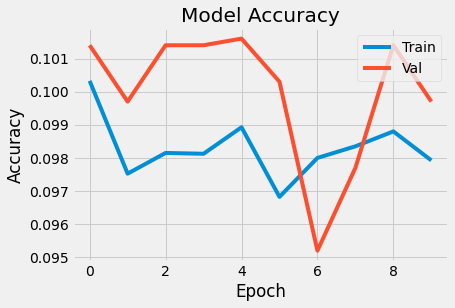

In [ ]:
#Visualise model accurracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Val'], loc= 'upper right')
plt.show

In [ ]:
#test
from google.colab import files
uploaded = files.upload()


Saving 71+mDoHG4mL.png to 71+mDoHG4mL.png


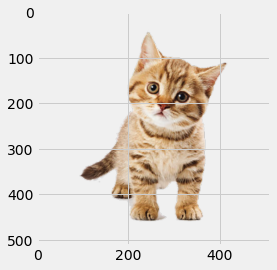

In [ ]:
new_image = plt.imread('71+mDoHG4mL.png')
img = plt.imshow(new_image)


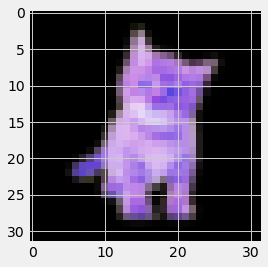

In [ ]:
#resize
from skimage.transform import resize
resized_image = resize(new_image, (32,32,3))
img = plt.imshow(resized_image)

In [ ]:
# Get the models predictions
predictions = model.predict(np.array([resized_image]))
print(predictions)

[[0.09578852 0.09816455 0.10499176 0.09469617 0.10502097 0.10704447
  0.10194652 0.10268206 0.09297056 0.09669437]]


In [ ]:
#sort
list_index = [0,1,2,3,4,5,6,7,8,9]
x= predictions
for i in range(10):
  for j in range (10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] =list_index[i]
      list_index[j] = temp

# show 
print(list_index)

[5, 5, 5, 5, 5, 5, 5, 5, 5, 5]


In [ ]:
# print first 5!! really? have tooo ...
for i in range(5):
  print(classification[list_index[i]])

dog
dog
dog
dog
dog
